# EDA STEPS

## STEP 1 — Data Summary (5–10 min)
- **Show head and dtypes---Review the dtype of each column to confirm if categorical variables, dates, etc., are properly formatted.** 
- **Convert dates if the dtype shows incorrect formatting**
- **Basic stats:** mean, median, std
- **Focus on:** `TotalPremium`, `TotalClaims`, `CustomValueEstimate`

## STEP 2 — Data Quality (10–15 min)
- **Check:**
  - Missing values
  - Duplicates
  - Outliers (boxplots for `TotalPremium`, `TotalClaims`, `CustomValueEstimate`)

## STEP 3 — Univariate Analysis (10–15 min)
- **Plot:**
  - Histogram → `TotalPremium`
  - Histogram → `TotalClaims`
  - Bar charts → `Province`, `VehicleType`, `Gender`

## STEP 4 — Bivariate Analysis (15–20 min)
- **Loss ratio:** `TotalClaims / TotalPremium`
- **Compare loss ratio by:**
  - Province
  - VehicleType
  - Gender
- **Scatter plot:** `TotalPremium` vs `TotalClaims`
- **Correlation matrix** (only numeric columns)

## STEP 5 — Trends (10 min)
- **Group by month or `TransactionMonth`:**
  - Monthly claims
  - Monthly premiums
  - Loss ratio trend

## STEP 6 — Geography + Car Insights (10–15 min)
- Claim amounts by Vehicle Make & Model
- Premiums or claims by province / postal code

## STEP 7 — Create 3 Beautiful Plots (15 min)
**Examples:**
- Loss Ratio by Province (bar plot)
- Top 10 vehicle makes with highest claims (bar plot)
- Premium vs Claim scatter plot with trendline


## STEP 1 — Data Summary (5–10 min)
- **Show head and dtypes---Review the dtype of each column to confirm if categorical variables, dates, etc., are properly formatted.** 
- **Convert dates if the dtype shows incorrect formatting**
- **Basic stats:** mean, median, std
- **Focus on:** `TotalPremium`, `TotalClaims`, `CustomValueEstimate`

In [2]:
import pandas as pd

In [3]:
# Load the .txt file into a DataFrame
file_path = '../data/raw/MachineLearningRating_v3.txt'
df = pd.read_csv(file_path, sep='|', engine='python')
# df.head()

# Save as CSv
csv_path = '../data/raw/MachineLearningRating_v3.csv'
df.to_csv(csv_path, index=False, sep="|")
print(f"Saved CSV to {csv_path}")

Saved CSV to ../data/raw/MachineLearningRating_v3.csv


In [4]:
# pd.set_option('display.max_columns', None)
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

## from df.info() we can see that that the numerical columns have correctly formatted dtypes . However, the date columns are formatted as object when they should be datetime types. We also can see tht all other categorical columns with the excepton of isVatRegistered are objects. 

In [5]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


## Let's focus on the key columns for our analysis. TotalPremium, TotalClaims, CustomValueEstimate, SumInsuredAmount

In [26]:
df[["TotalPremium", "TotalClaims", "CustomValueEstimate", "SumInsured"]].describe()


,TotalPremium,TotalClaims,CustomValueEstimate,SumInsured
count,1.000098e+06,1.000098e+06,2.204560e+05,1.000098e+06
mean,6.190550e+01,6.486119e+01,2.255311e+05,6.041727e+05
std,2.302845e+02,2.384075e+03,5.645157e+05,1.508332e+06
min,-7.825768e+02,-1.200241e+04,2.000000e+04,1.000000e-02
25%,0.000000e+00,0.000000e+00,1.350000e+05,5.000000e+03
50%,2.178333e+00,0.000000e+00,2.200000e+05,7.500000e+03
75%,2.192982e+01,0.000000e+00,2.800000e+05,2.500000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07,1.263620e+07


## from the  describe we can see that All columns show high variability (std >> mean).
## The quartiles (25%, 50%, 75%) are much lower than the max, confirming the presence of extreme outliers.
## The data is highly skewed, with most values low and a few very large values.

## STEP 2 — Data Quality 
- **Check:**
  - Missing values
  - Duplicates
  - Outliers (boxplots for `TotalPremium`, `TotalClaims`, `CustomValueEstimate`)

In [28]:
### Now lets check for missing values in the dataset.
missing_percent = (df.isna().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0.0])


Bank                        14.594670
AccountType                  4.022806
MaritalStatus                0.825819
Gender                       0.953507
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
Model                        0.055195
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
bodytype                     0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
CustomValueEstimate         77.956560
CapitalOutstanding           0.000200
NewVehicle                  15.327998
WrittenOff                  64.183810
Rebuilt                     64.183810
Converted                   64.183810
CrossBorder                 99.930207
NumberOfVehiclesInFleet    100.000000
dtype: float64


## we can see from the above cell that quite a number of columns have missing values. Most columns are not key columns. However,customValueEstimate has a large - 77% missing values this could be a problem to to EDA or modelling. WrittenOff, Rebuilt, Converted, CrossBorder and NumberOfSuppliments also have a significant amount of missing values. We will have to decide later how to handle these missing values depending on their importance to the analysis and modelling. NumberofVechilesInFleet has 100% missing values so we will drop this column from the dataset.

Number of duplicate rows: 0


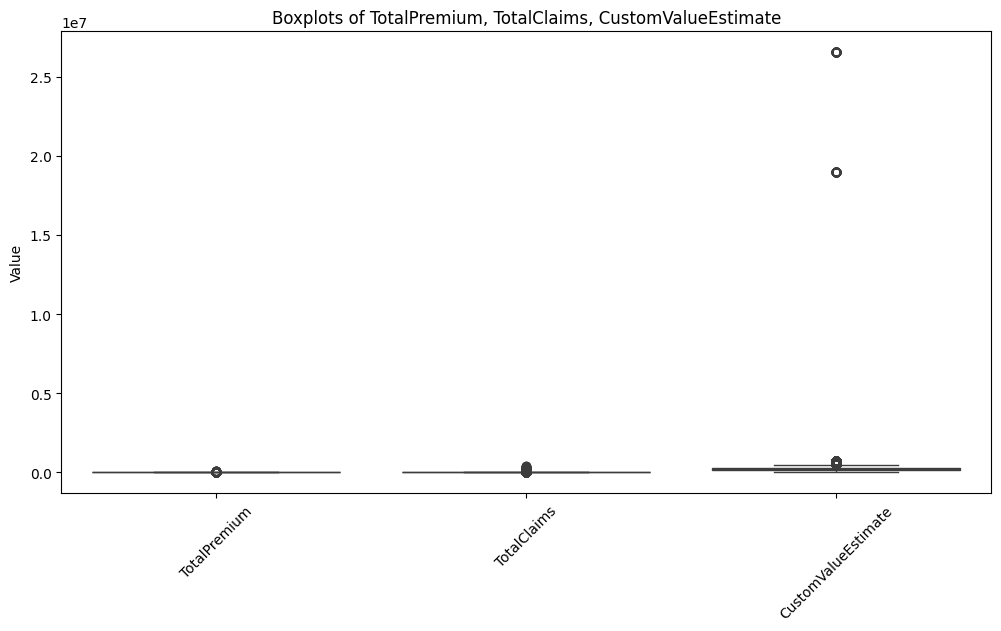

In [ ]:
# Let's check duplicates
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Optionally view some duplicate rows
if duplicate_count > 0:
    display(df[df.duplicated()].head())

# Boxplots for outliers in key numeric columns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']])
plt.title('Boxplots of TotalPremium, TotalClaims, CustomValueEstimate')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## the box plots show that most all data points lie very close to 0 on the y‑axis. So we are unablle to get a proper box plot so instead we will take the log of the non zero values 

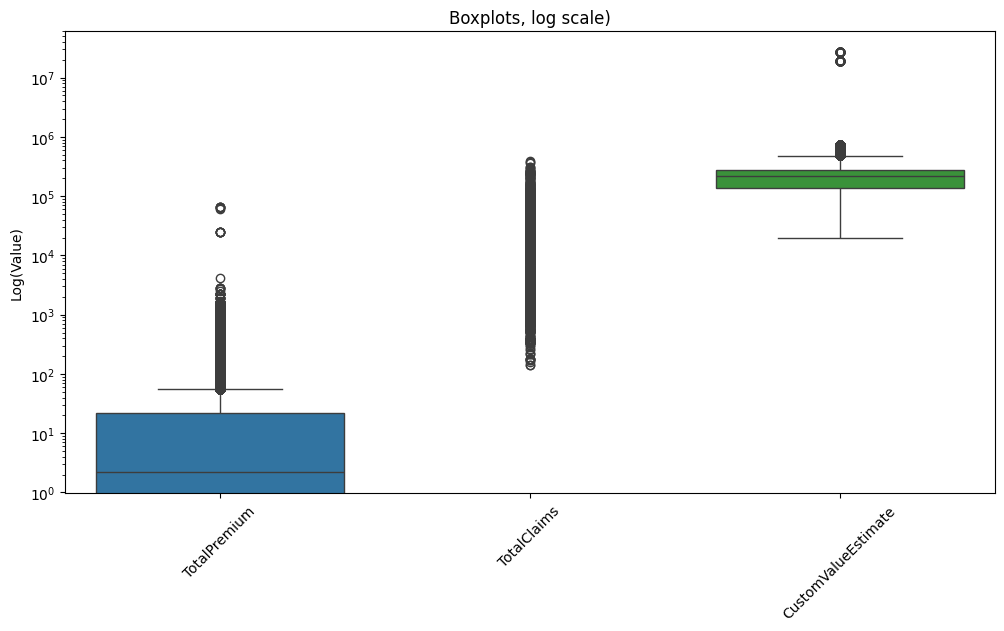

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.yscale('log')
plt.title('Boxplots, log scale)')
plt.ylabel('Log(Value)')
plt.xticks(rotation=45)
plt.show()


## TotalPremium:

## Visible box (Q1–Q3 for non‑zero premiums).
## Many outliers above the upper whisker.

## TotalClaims:

## Box and whiskers collapsed because most values are 0.
## Long vertical stack of outlier points (non‑zero claims).

## CustomValueEstimate:

## Clear, wide box and whiskers → a more continuous distribution with fewer zeros.
## less number of outliers compared to the other two columns. but extreme few high outliers that go above 10000000

## STEP 3 — Univariate Analysis (10–15 min)
- **Plot:**
  - Histogram → `TotalPremium`
  - Histogram → `TotalClaims`
  - Bar charts → `Province`, `Make`, `Gender`

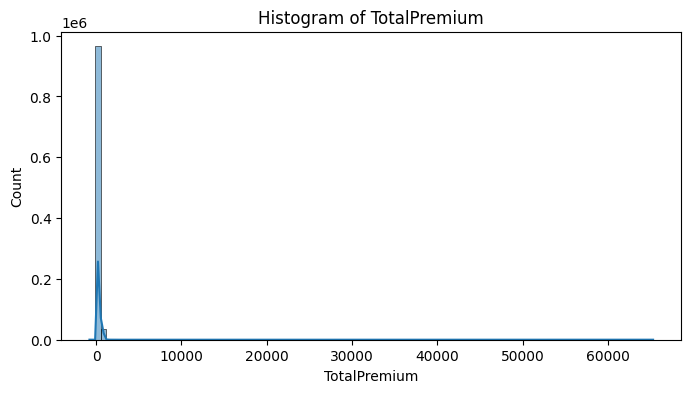

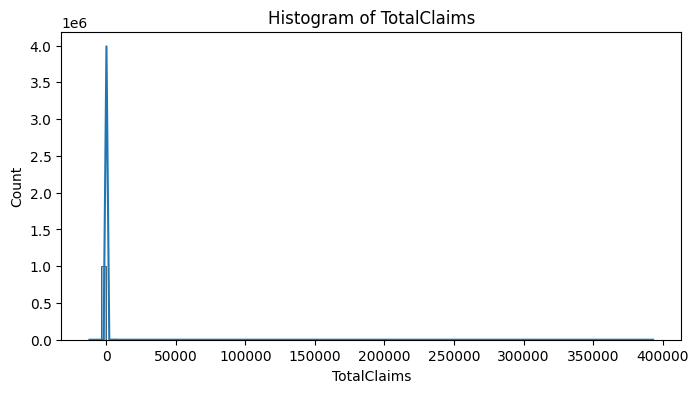

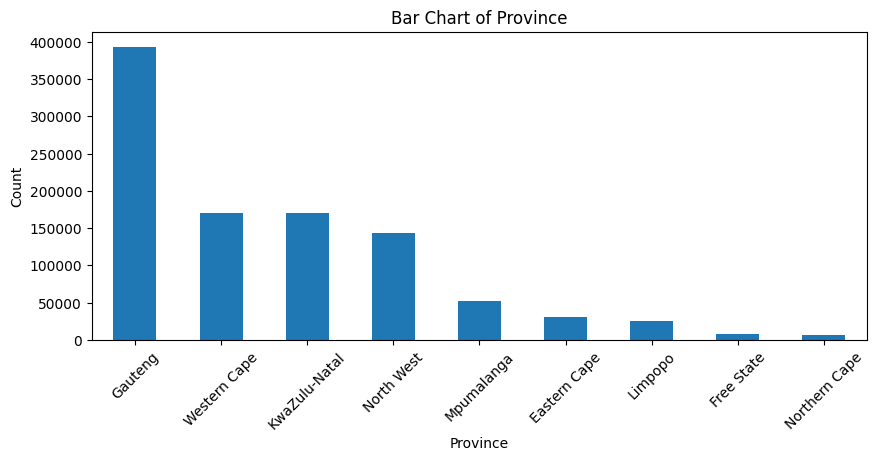

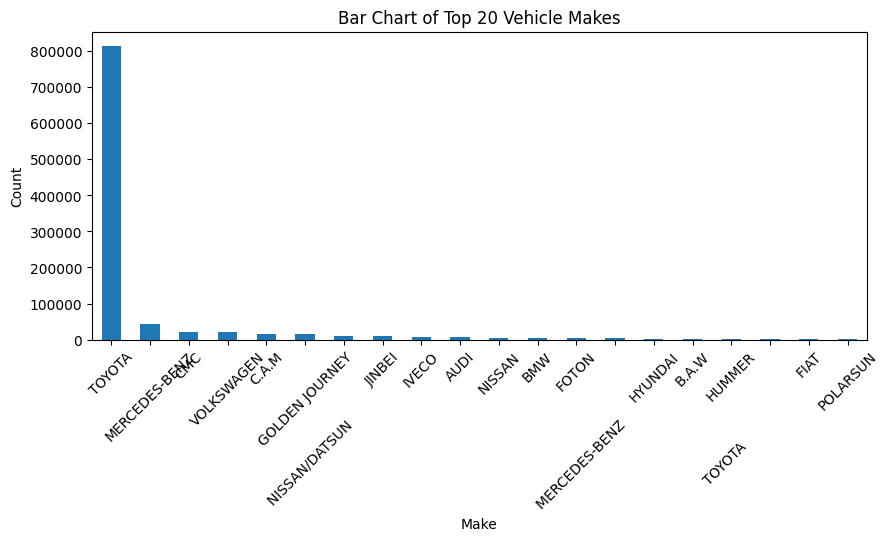

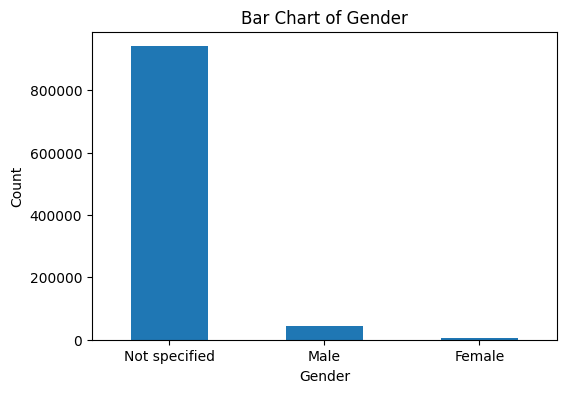

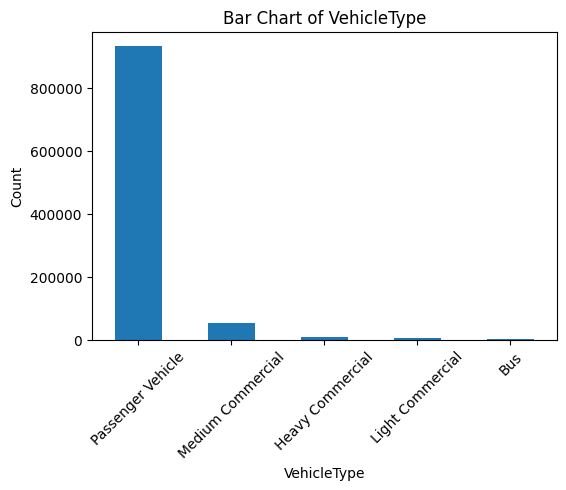

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for TotalPremium
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalPremium'].dropna(), bins=100, kde=True)
plt.title('Histogram of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Count')
#show log scale
# plt.yscale('log')
plt.show()

# Histogram for TotalClaims
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalClaims'].dropna(), bins=100, kde=True)
plt.title('Histogram of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Count')
#show log scale
# plt.yscale('log')
plt.show()

# Bar chart for Province
plt.figure(figsize=(10, 4))
df['Province'].dropna().value_counts().plot(kind='bar')
plt.title('Bar Chart of Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Make
plt.figure(figsize=(10, 4))
df['make'].dropna().value_counts().head(20).plot(kind='bar')
plt.title('Bar Chart of Top 20 Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Gender
plt.figure(figsize=(6, 4))
df['Gender'].dropna().value_counts().plot(kind='bar')
plt.title('Bar Chart of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar chart for VehicleType
plt.figure(figsize=(6, 4))
df['VehicleType'].dropna().value_counts().plot(kind='bar')
plt.title('Bar Chart of VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## The total claims and total premium ca be seen that they have a very large number of 0 values and very few high values . This is also cross-checked in the box plots above.
## Gauteng is the province with the highest number of policies, followed by KwaZulu-Natal and Western Cape and Northwest
## toyota is the most common vehicle make in the dataset followed by mercedez benz
## most of the gendeers are non specified. Male specified more
## the most common vehicle type is passenger vehicle followed by medium commercial vehicle

## STEP 4 — Bivariate Analysis and multivariate analysis (15–20 min)
- **Loss ratio:** `TotalClaims / TotalPremium`
- **Compare loss ratio by:**
  - Province
  - VehicleType
  - make
  - Gender
- **Correlation analysis**
- **Mulitivariate analysis**

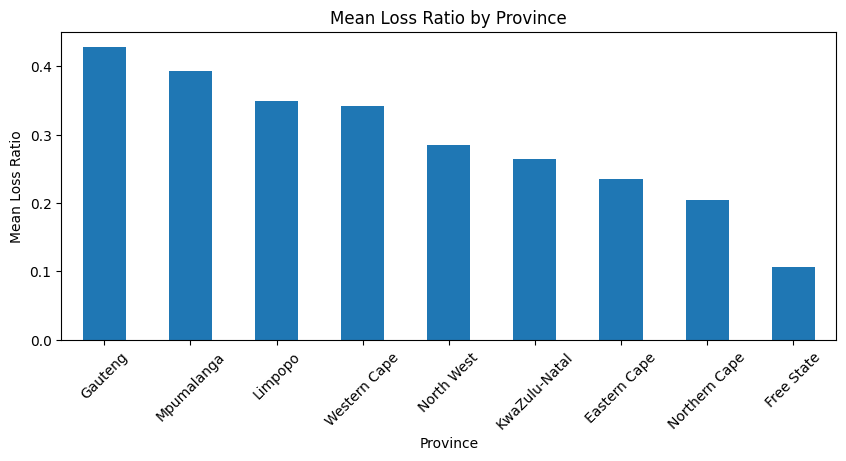

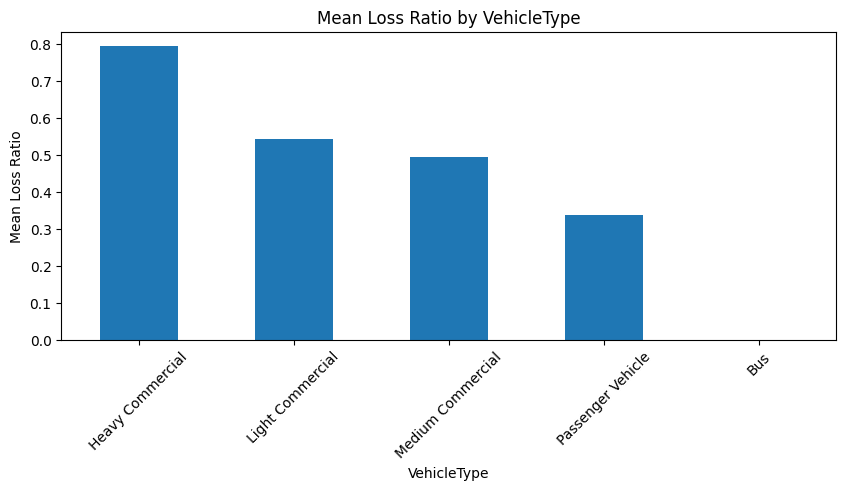

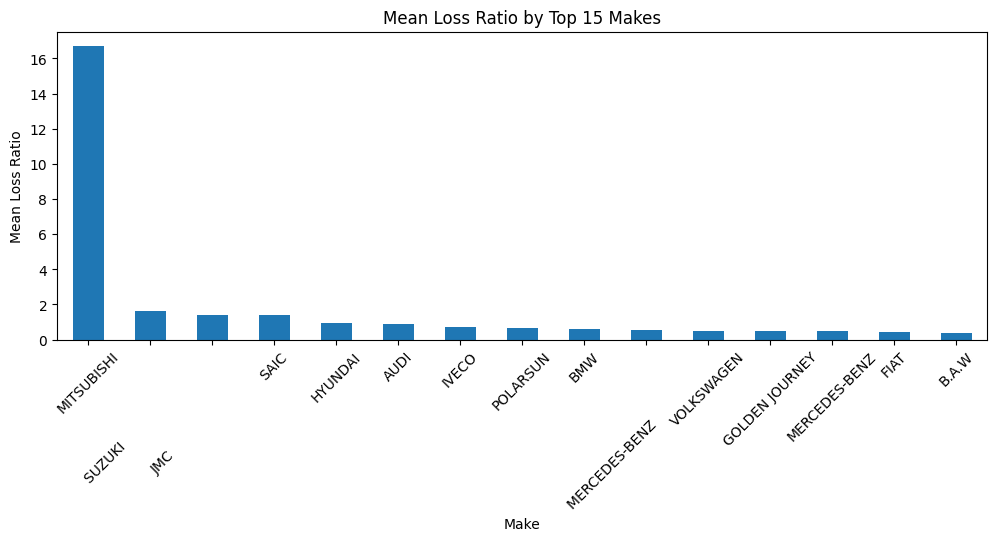

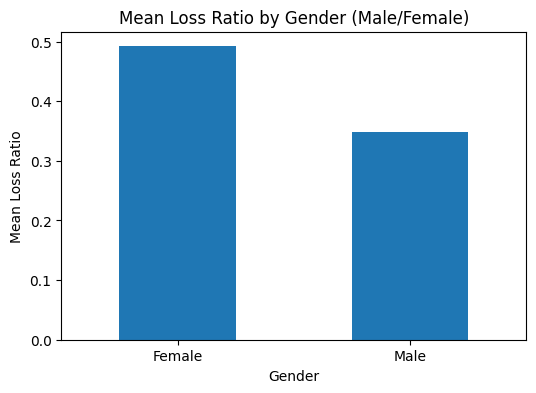

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Loss Ratio
loss_ratio = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)
df['LossRatio'] = loss_ratio

# Province (mean loss ratio)
province_loss = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
province_loss.plot(kind='bar')
plt.title('Mean Loss Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=45)
plt.show()


# VehicleType (mean loss ratio)
vehicletype_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
vehicletype_loss.plot(kind='bar')
plt.title('Mean Loss Ratio by VehicleType')
plt.xlabel('VehicleType')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=45)
plt.show()

# Make (mean loss ratio, top 15)
make_loss = df.groupby('make')['LossRatio'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 4))
make_loss.plot(kind='bar')
plt.title('Mean Loss Ratio by Top 15 Makes')
plt.xlabel('Make')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=45)
plt.show()

# Gender (mean loss ratio, only Male and Female)
gender_loss = df[df['Gender'].isin(['Male', 'Female'])].groupby('Gender')['LossRatio'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
gender_loss.plot(kind='bar')
plt.title('Mean Loss Ratio by Gender (Male/Female)')
plt.xlabel('Gender')
plt.ylabel('Mean Loss Ratio')
plt.xticks(rotation=0)
plt.show()


## Higher loss ratios indicate that a larger proportion of premiums are being paid out as claims, which may suggest higher risk or more frequent claims in those categories. While lower loss ratios may indicate more profitable segments for the insurer.

## From bivariate analysis we can see that for provinces: Guateng has the highest loss ratio followed by Mpumalanga and Limpopo. Free state has the lowest loss ratio. 

## For VehicleType :  Heavy commercial vehicle has the highest loss ratio followed by light commercial vehicle. Passenger vehicle has the lowest loss ratio.

## For make Mitsibishi has the highest loss ratio followed by suzuki and jmc. B.A.W has the lowest loss ratio.

## For gender: Male has the lower loss ratio - Female has the higher loss ratio by 0.1

## Correlation analyssis

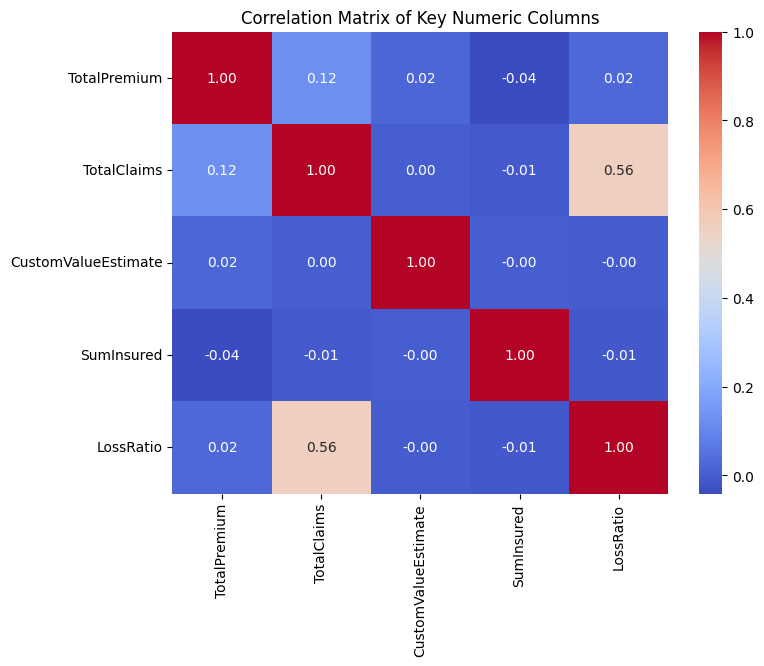

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns for correlation matrix
corr_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'LossRatio']
corr_cols = [col for col in corr_cols if col in df.columns]  # Only keep columns that exist in df

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Numeric Columns')
plt.show()

## from the correlation matrix we can see that there's not much correlation between key numerical columns 
## Ofcourse, we would expect high correlation between teh totalClaims and Loss Ratio aswell as the totalPremiums and LossRatio as loss ratio= totalClaim/totalPremium

## We can see that the totalClaims and totalPremiums are positiviely correltaed by a factor of 0.12


# Multivarite analysis Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of ZipCode, using scatter plots

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure TransactionMonth is datetime
if not np.issubdtype(df['TransactionMonth'].dtype, np.datetime64):
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Group by month and ZipCode, aggregate TotalPremium and TotalClaims
monthly_zip = df.groupby([df['TransactionMonth'].dt.to_period('M'), 'PostalCode'])[['TotalPremium', 'TotalClaims']].sum().reset_index()
monthly_zip['TransactionMonth'] = monthly_zip['TransactionMonth'].astype(str)

In [81]:
monthly_zip.head()

,TransactionMonth,PostalCode,TotalPremium,TotalClaims
0,2013-10,7405,151.867402,0.000000
1,2013-10,7766,172.206933,0.000000
2,2013-10,7945,46.989177,0.000000
3,2013-11,1,1432.740561,50585.078947
4,2013-11,84,120.874211,0.000000


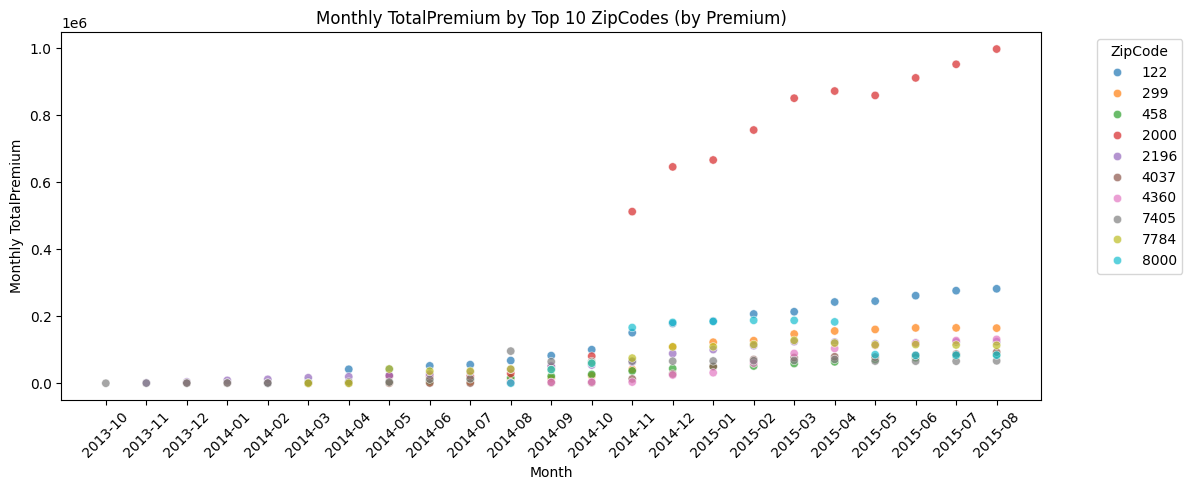

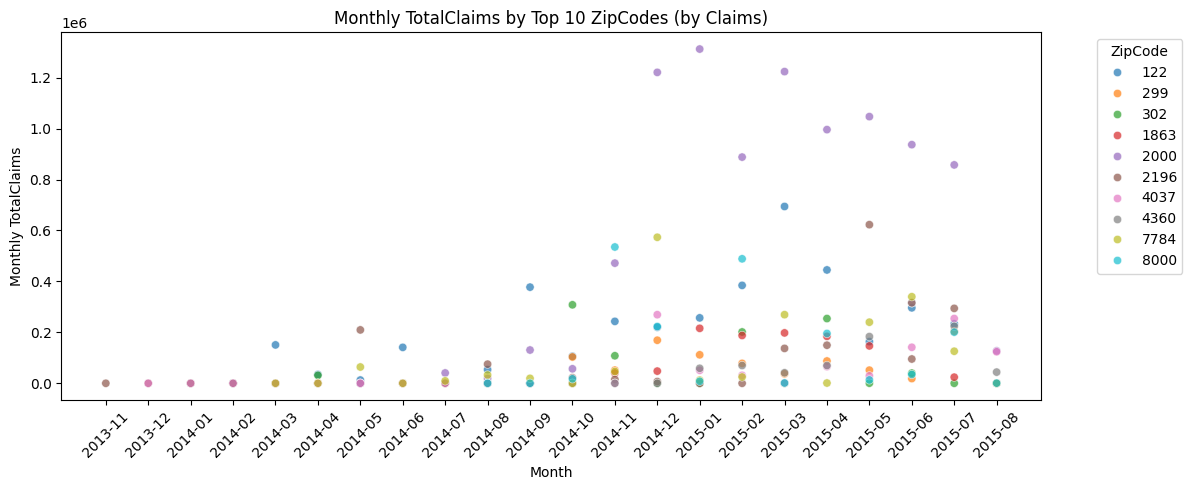

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only show top 10 zipcodes by total premium
zip_premium = monthly_zip.groupby('PostalCode')['TotalPremium'].sum().sort_values(ascending=False)
top_zipcodes_premium = zip_premium.head(10).index
monthly_zip_top_premium = monthly_zip[monthly_zip['PostalCode'].isin(top_zipcodes_premium)]

# Only show top 10 zipcodes by total claims
zip_claim = monthly_zip.groupby('PostalCode')['TotalClaims'].sum().sort_values(ascending=False)
top_zipcodes_claim = zip_claim.head(10).index
monthly_zip_top_claim = monthly_zip[monthly_zip['PostalCode'].isin(top_zipcodes_claim)]

# Use a distinct color palette for 10 zipcodes
palette = sns.color_palette('tab10', n_colors=10)

# 1) Monthly TotalPremium by Top 10 ZipCodes (by premium)
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=monthly_zip_top_premium,
    x='TransactionMonth',
    y='TotalPremium',
    hue='PostalCode',
    palette=palette,
    alpha=0.7
)
plt.title('Monthly TotalPremium by Top 10 ZipCodes (by Premium)')
plt.xlabel('Month')
plt.ylabel('Monthly TotalPremium')
plt.xticks(rotation=45)
plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Monthly TotalClaims by Top 10 ZipCodes (by claims)
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=monthly_zip_top_claim,
    x='TransactionMonth',
    y='TotalClaims',
    hue='PostalCode',
    palette=palette,
    alpha=0.7
)
plt.title('Monthly TotalClaims by Top 10 ZipCodes (by Claims)')
plt.xlabel('Month')
plt.ylabel('Monthly TotalClaims')
plt.xticks(rotation=45)
plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## from both the premium and claims scatter plots we can see that zipcode 2000 is both high in claims and premiums.
## for the premiumns zipcode 2000  shows a trend of increasing as of November 2014
## zipcode 122 and 8000 are also having the highest premiums  from November 2014
## 

## STEP 5 — Trends (10 min)
- **Group by month or `TransactionMonth`:**
  - Monthly claims
  - Monthly premiums
  - Loss ratio trend

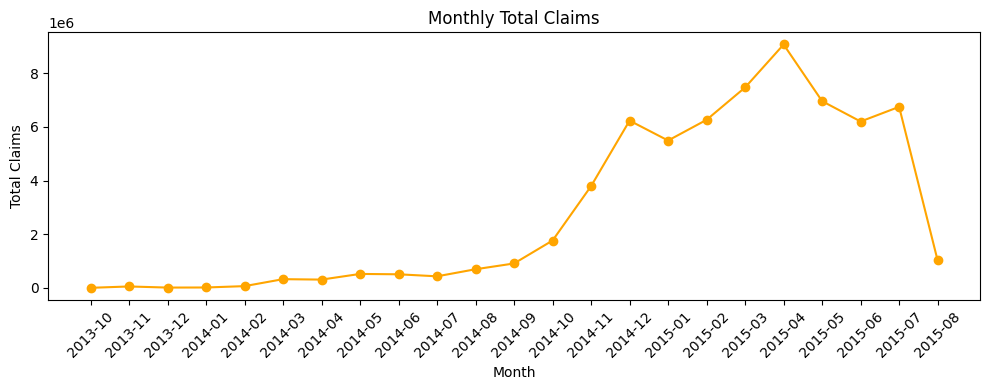

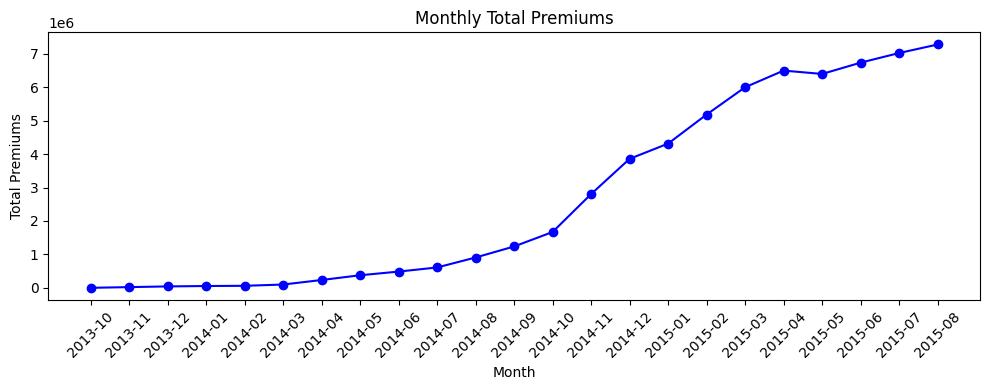

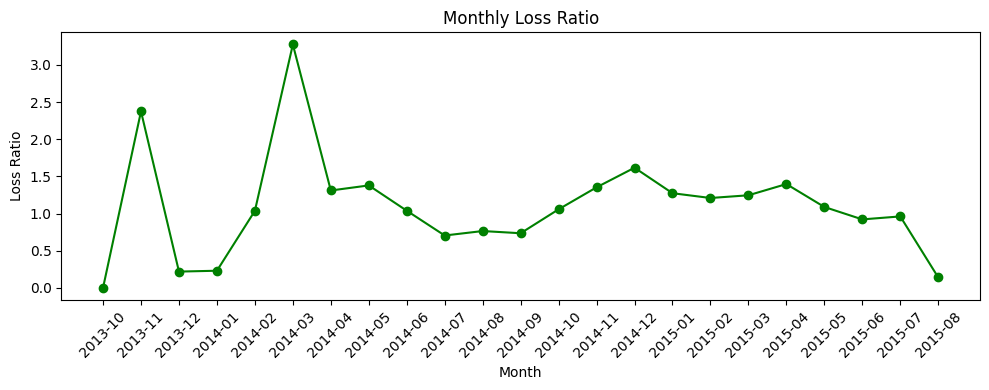

In [90]:
# Group by month and calculate monthly totals
monthly = df.copy()
if not pd.api.types.is_datetime64_any_dtype(monthly['TransactionMonth']):
    monthly['TransactionMonth'] = pd.to_datetime(monthly['TransactionMonth'], errors='coerce')
monthly_grouped = monthly.groupby(monthly['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).reset_index()
monthly_grouped['TransactionMonth'] = monthly_grouped['TransactionMonth'].astype(str)
monthly_grouped['LossRatio'] = monthly_grouped['TotalClaims'] / monthly_grouped['TotalPremium'].replace(0, np.nan)

# Plot monthly TotalClaims
plt.figure(figsize=(10, 4))
plt.plot(monthly_grouped['TransactionMonth'], monthly_grouped['TotalClaims'], marker='o', color='orange')
plt.title('Monthly Total Claims')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly TotalPremiums
plt.figure(figsize=(10, 4))
plt.plot(monthly_grouped['TransactionMonth'], monthly_grouped['TotalPremium'], marker='o', color='blue')
plt.title('Monthly Total Premiums')
plt.xlabel('Month')
plt.ylabel('Total Premiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot monthly Loss Ratio
plt.figure(figsize=(10, 4))
plt.plot(monthly_grouped['TransactionMonth'], monthly_grouped['LossRatio'], marker='o', color='green')
plt.title('Monthly Loss Ratio')
plt.xlabel('Month')
plt.ylabel('Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretation of Monthly Trends:

## Monthly Total Claims: Claims increased gradually from late 2013, with a sharp rise starting in late 2014, peaking around mid-2015, then declining.
## Monthly Total Premiums: Premiums show a steady and strong upward trend throughout the period, indicating business growth or more policies written.
## Monthly Loss Ratio: The loss ratio is volatile early on, with some high spikes, but stabilizes over time. After early fluctuations, it trends downward, suggesting improved risk management or profitability as premiums grow faster than claims.


## STEP 6 — Geography + Car Insights (10–15 min)
- Claim amounts by Vehicle Make & Model
- Premiums or claims by province / postal code

C:\Users\yeget\AppData\Local\Temp\ipykernel_35736\1334216210.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')


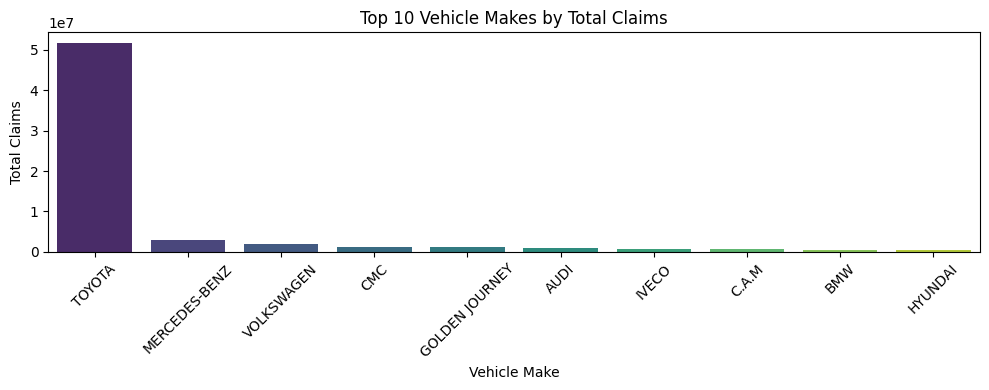

C:\Users\yeget\AppData\Local\Temp\ipykernel_35736\1334216210.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette='plasma')


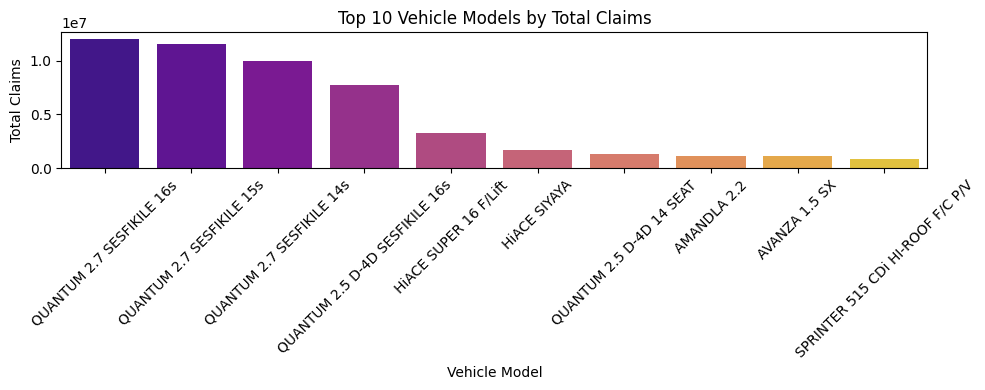

C:\Users\yeget\AppData\Local\Temp\ipykernel_35736\1334216210.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_postal.index.astype(str), y=top_postal.values, palette='mako')


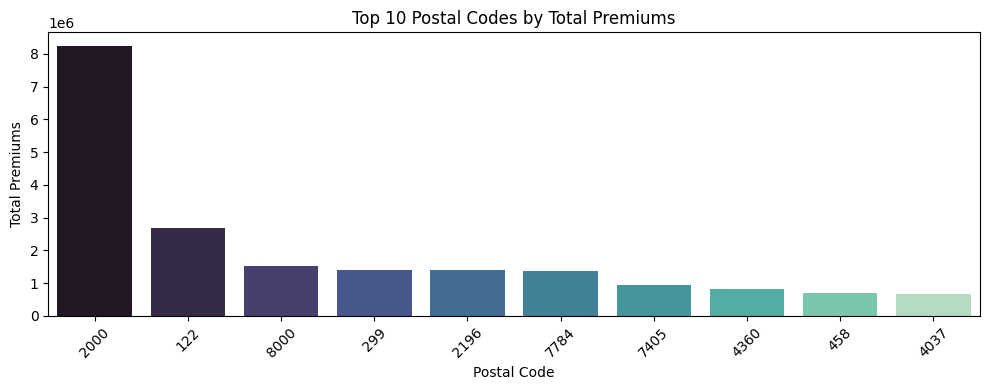

C:\Users\yeget\AppData\Local\Temp\ipykernel_35736\1334216210.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_postal_claims.index.astype(str), y=top_postal_claims.values, palette='crest')


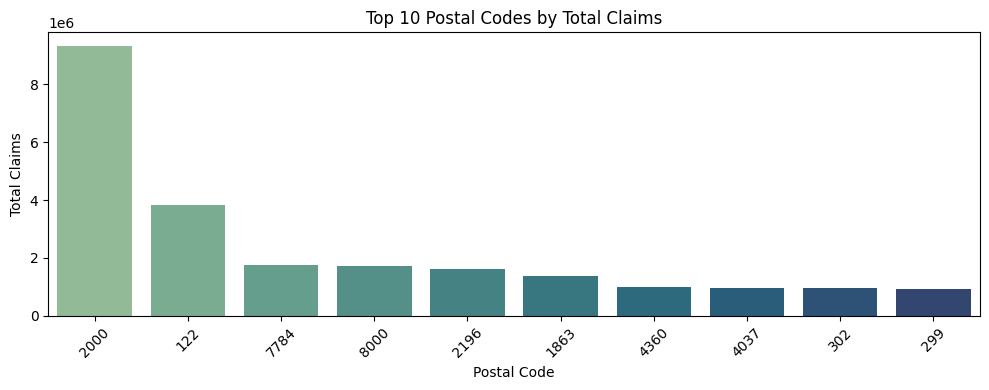

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Claim amounts by Vehicle Make & Model (Top 10 Makes by Total Claims) ---
top_makes = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Vehicle Makes by Total Claims')
plt.xlabel('Vehicle Make')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_models = df.groupby('Model')['TotalClaims'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_models.index, y=top_models.values, palette='plasma')
plt.title('Top 10 Vehicle Models by Total Claims')
plt.xlabel('Vehicle Model')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

# --- Premiums by Top 10 Postal Codes ---
top_postal = df.groupby('PostalCode')['TotalPremium'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_postal.index.astype(str), y=top_postal.values, palette='mako')
plt.title('Top 10 Postal Codes by Total Premiums')
plt.xlabel('Postal Code')
plt.ylabel('Total Premiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Claims by Top 10 Postal Codes ---
top_postal_claims = df.groupby('PostalCode')['TotalClaims'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_postal_claims.index.astype(str), y=top_postal_claims.values, palette='crest')
plt.title('Top 10 Postal Codes by Total Claims')
plt.xlabel('Postal Code')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretation of Geography and Car Insights:

## Top 10 Postal Codes by Total Premiums and Claims: Postal code 2000 stands out with the highest total premiums and claims, indicating a concentration of insurance activity and risk in this area. Other postal codes such as 122, 8000, and 7784 also show significant premium and claim volumes, suggesting they are key markets for the insurer.
## Top 10 Vehicle Makes by Total Claims: Toyota dominates the claims volume by a large margin, followed by Mercedes-Benz and Volkswagen. This may reflect both the popularity of these brands and their exposure to risk.
## Top 10 Vehicle Models by Total Claims: Specific Toyota Quantum models account for the highest number of claims, highlighting these as high-risk or high-frequency vehicles in the portfolio. This insight can inform underwriting and pricing strategies for these models.